[-1.47473776  0.17485145  1.21687772 -1.96942697  1.68751059 -0.51920861
 -0.92181405  1.87864259 -1.84869111  0.84769199  0.59856773 -1.73042242
  1.95335155 -1.15025886 -0.25702138  1.52929799 -1.99829211  1.41765883
 -0.09238289 -1.28141829  1.98213883 -1.64171667  0.43896274  0.99436175
 -1.90538555  1.81558227 -0.77212216 -0.67690456  1.77037887 -1.93394001
  1.08167548  0.33875235 -1.58124635  1.99317135 -1.35815869  0.00975655
  1.34377033 -1.9914654   1.59311888 -0.35796717 -1.06521119  1.92887432
 -1.7793726   0.69523364  0.75408531 -1.80731171  1.91122551 -1.01124471
 -0.41990476  1.63049411 -1.98464647  1.29633897  0.07288645 -1.40382736
  1.99739077 -1.54180022  0.27636022  1.13424136 -1.94906878  1.74012396
 -0.61715773 -0.82997816  1.84115786 -1.88524685  0.93908685  0.50034002
 -1.67695716  1.97273203 -1.23230524 -0.15540496  1.46148681 -1.99990481
  1.48784832 -0.19428129 -1.20133437  1.96593444 -1.69790338  0.53802778
  0.9044535  -1.87185951  1.85604839 -0.86532513 -0

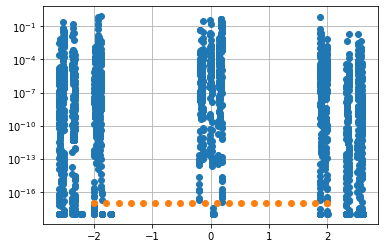

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
n=200;#laatice sites
no=50;#bath lattice point
lamba = 1.0
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
siteindx = np.array(range(1, n+1))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
diagonals = [sitepotential,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print(sys_Ham)
eigvals, eigvecs = la.eig(sys_Ham)
energyval = (eigvals.real)
print(eigvals.real)
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat =  -2*((gamma**2/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)).imag
    return mat
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/(2*to**2))*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
    return (np.linalg.det(mat)/t)
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    mat  = spcdn1*spcdn2/(ret_gre(energy)**2)
    return abs(mat)
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    for i in range(len(eigvals)):
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
free_energy = makelist(energyval) + makeeigran(energyval, 0.01, 10)
mat = np.zeros(len(free_energy), dtype = float)
num = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
print(np.max(mat))
for j in range(len(mat)):
    if mat[j]>1.0E-18:
        num[j]= mat[j] 
    else:
        num[j] = 1.0E-18
plt.plot(free_energy,num,'o')
#print(free_energy)
free_energy = np.linspace(start=-2.0*t,stop=2.0*t,endpoint=True,num=20)
mat = np.zeros(len(free_energy), dtype = float)
num = np.zeros(len(free_energy), dtype = float)
for i in range(1,len(free_energy)-1):
    print(i)
    fe = free_energy[i]
    rl = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[0],sitegammastrn[0],fe).real
    nr = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[1],sitegammastrn[1],fe).real
    nl = trnasmission(sitegammaindx[2],sitegammastrn[2],sitegammaindx[0],sitegammastrn[0],fe).real
    rn = trnasmission(sitegammaindx[1],sitegammastrn[1],sitegammaindx[2],sitegammastrn[2],fe).real
    if nr + nl == 0:
        mat[i] = rl
    else:
        mat[i] = (rl+(rn*nl)/(nr+nl))
    print(mat[i])
for j in range(len(mat)):
    if mat[j]>1.0E-18:
        num[j]= mat[j] 
    else:
        num[j] = 10E-18
plt.plot(free_energy,num,'o')
plt.yscale('log')
plt.grid()
plt.show()


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
n=200;#laatice sites
no=50;#bath lattice point
lamba = 1.2
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
siteindx = np.array(range(1, n+1))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
diagonals = [sitepotential,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print((sys_Ham[0][0]))

[-1.76968531  0.20982174  1.46025327 -2.36331236  2.02501271 -0.62305033
 -1.10617686  2.25437111 -2.21842933  1.01723039  0.71828127 -2.0765069
  2.34402186 -1.38031063 -0.30842566  1.83515759 -2.39795053  1.70119059
 -0.11085947 -1.53770195  2.37856659 -1.97006001  0.52675529  1.1932341
 -2.28646267  2.17869872 -0.9265466  -0.81228547  2.12445465 -2.32072801
  1.29801057  0.40650281 -1.89749562  2.39180562 -1.62979043  0.01170787
  1.6125244  -2.38975848  1.91174266 -0.4295606  -1.27825343  2.31464919
 -2.13524712  0.83428036  0.90490237 -2.16877406  2.29347062 -1.21349365
 -0.50388571  1.95659293 -2.38157576  1.55560676  0.08746374 -1.68459284
  2.39686892 -1.85016026  0.33163227  1.36108963 -2.33888254  2.08814876
 -0.74058927 -0.9959738   2.20938943 -2.26229622  1.12690422  0.60040802
 -2.0123486   2.36727843 -1.47876629 -0.18648596  1.75378417 -2.39988577
  1.78541799 -0.23313755 -1.44160125  2.35912133 -2.03748406  0.64563333
  1.0853442  -2.24623141  2.22725806 -1.03839015 -0.6

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math,cmath
from scipy.sparse import diags
n=20;#laatice sites
no=50;#bath lattice point
lamba = 1.0
b = (1+np.sqrt(5))/2
sitegammaindx = [0, n-1, no-1]
sitegammastrn = [1.0, 1.0, 0.0]
to = 3.0 #bath tunneling potential
t = 1.0 #system hopping
siteindx = np.array(range(1, n+1))
sitepotential = 2*lamba*np.cos(2*np.pi*b*(siteindx))
print(sitepotential)
diagonals = [sitepotential,t*np.ones(n-1), t*np.ones(n-1)]
offset = [0,-1,1]
sys_Ham = diags(diagonals,offset,dtype='complex_').toarray()
print(sys_Ham)
eigvals, eigvecs = la.eig(sys_Ham)
energyval = (eigvals.real)
print(eigvals.real)
def Rand(start, end, num):
    res = []
 
    for j in range(num):
        res.append(random.uniform(start, end))
 
    return res
def rnger(number,epsion):
    mat = []
    mat.append(number + epsion)
    mat.append(number - epsion)
    return mat
def specden(gamma,site,energy):#spectral density matrix(-2Im(sigma))
    mat =  -2*((gamma**2/(2*to**2))*(energy - np.sqrt(4*to**2-energy**2)*1j)).imag
    return mat
def ret_gre(energy):   
    k = [np.ones(n-1),np.ones(n),np.ones(n-1)]
    offset = [-1,0,1]
    mat = diags(k,offset,dtype='complex_').toarray()
    for i in range(n-1):
        mat[i, i] = (energy - sitepotential[i]) / t
    for i in range(3):
        temp = ((sitegammastrn[i]**2/(2*to**2))*(energy  - np.sqrt(4*to**2-energy**2)*1j))
        mat[sitegammaindx[i],sitegammaindx[i]] = (energy - sitepotential[i] - temp)/t
    return (np.linalg.det(mat)/t)
def trnasmission(sgindx1,sgstrn1,sgindx2,sgstrn2,energy):
    spcdn1 = specden(sgstrn1,sgindx1,energy)
    retgre = ret_gre(energy)
    spcdn2 = specden(sgstrn2,sgindx2,energy)
    mat  = spcdn1*spcdn2/(ret_gre(energy)**2)
    return abs(mat)
def makeeigran(eigvals, epsion, number):
    temp = []
    mat = []
    for i in range(len(eigvals)):
        temp.append(Rand(rnger(eigvals[i],epsion)[0],rnger(eigvals[i],epsion)[1],number))
    for k in range(len(eigvals)):
        for l in range(number):
            mat.append(temp[k][l])
    
    return mat
def makelist(pointer):
    moin = []
    for i in range(len(pointer)):
        moin.append(pointer[i])
    return moin
pun = np.linspace(start=-2.0*t,stop=2.0*t,endpoint=True,num=4)
free_energy = makelist(energyval) + makeeigran(energyval, 0.01, 200) 
print([*pun,*free_energy])

[-1.47473776  0.17485145  1.21687772 -1.96942697  1.68751059 -0.51920861
 -0.92181405  1.87864259 -1.84869111  0.84769199  0.59856773 -1.73042242
  1.95335155 -1.15025886 -0.25702138  1.52929799 -1.99829211  1.41765883
 -0.09238289 -1.28141829]
[[-1.47473776+0.j  1.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 1.        +0.j  0.17485145+0.j  1.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
   0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  1.        +0.j  1.21687772+0.j  1.        +0.j
   0.        +0.j  0.      